In [1]:
## Imports for Functions

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import datetime

In [2]:
## Customer Profiles Table
def generate_customer_profiles_table(n_customers, random_state = 0):
    
    np.random.seed(random_state)
        
    customer_id_properties=[]
    
    # Generate customer properties from random distributions 
    for customer_id in range(n_customers):
        
        x_customer_id = np.random.uniform(0,100)
        y_customer_id = np.random.uniform(0,100)
        
        mean_amount = np.random.uniform(5,2000) # Arbitrary (but sensible) value 
        std_amount = mean_amount/2 # Arbitrary (but sensible) value
        
        mean_nb_tx_per_day = np.random.uniform(0,10) # Arbitrary (but sensible) value 
        
        customer_id_properties.append([customer_id,
                                      x_customer_id, 
                                      y_customer_id,
                                      mean_amount, 
                                      std_amount,
                                      mean_nb_tx_per_day])
        
    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=['customer_id',
                                                                      'x_customer_id', 
                                                                      'y_customer_id',
                                                                      'mean_amount', 
                                                                      'std_amount',
                                                                      'mean_nb_tx_per_day'])
    
    return customer_profiles_table

In [3]:
n_customers = 5
customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
customer_profiles_table


,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,54.881350,71.518937,1207.512935,603.756468,5.448832
1,1,42.365480,64.589411,877.986486,438.993243,8.917730
2,2,96.366276,38.344152,1584.491451,792.245725,5.288949
3,3,56.804456,92.559664,146.716936,73.358468,0.871293
4,4,2.021840,83.261985,1557.422718,778.711359,8.700121


In [4]:
## Terminal Profiles Table

def generate_terminal_profiles_table(n_terminals, random_state=0):
    
    np.random.seed(random_state)
        
    terminal_id_properties=[]
    
    # Generate terminal properties from random distributions 
    for terminal_id in range(n_terminals):
        
        x_terminal_id = np.random.uniform(0,100)
        y_terminal_id = np.random.uniform(0,100)
        
        terminal_id_properties.append([terminal_id,
                                      x_terminal_id, y_terminal_id])
                                       
    terminal_profiles_table = pd.DataFrame(terminal_id_properties, columns=['terminal_id',
                                                                      'x_terminal_id', 
                                                                      'y_terminal_id'])
    
    return terminal_profiles_table

In [5]:
n_terminals = 5
terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 0)
terminal_profiles_table

,terminal_id,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [6]:
## List of Terminals within Radius

def get_list_terminals_within_radius(customer_profile, x_y_terminals, r):
    
    # Use numpy arrays in the following to speed up computations
    
    # Location (x,y) of customer as numpy array
    x_y_customer = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)
    
    # Squared difference in coordinates between customer and terminal locations
    squared_diff_x_y = np.square(x_y_customer - x_y_terminals)
    
    # Sum along rows and compute suared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))
    
    # Get the indices of terminals which are at a distance less than r
    available_terminals = list(np.where(dist_x_y<r)[0])
    
    # Return the list of terminal IDs
    return available_terminals
    

In [7]:
# We first get the geographical locations of all terminals as a numpy array
x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)

# And get the list of terminals within radius of $50$ for the last customer
get_list_terminals_within_radius(customer_profiles_table.iloc[4], x_y_terminals=x_y_terminals, r=50)

[2, 3]

In [8]:
terminal_profiles_table

,terminal_id,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


In [9]:
%%capture

terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot locations of terminals
ax.scatter(terminal_profiles_table.x_terminal_id.values, 
           terminal_profiles_table.y_terminal_id.values, 
           color='blue', label = 'Locations of terminals')

# Plot location of the last customer
customer_id=4
ax.scatter(customer_profiles_table.iloc[customer_id].x_customer_id, 
           customer_profiles_table.iloc[customer_id].y_customer_id, 
           color='red',label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profiles_table.iloc[customer_id].x_customer_id,
                   customer_profiles_table.iloc[customer_id].y_customer_id), 
                   radius=50, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
    
ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)

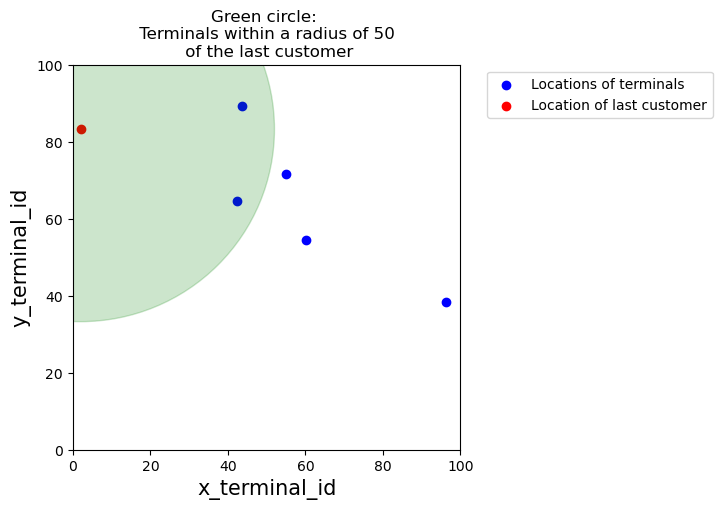

In [10]:
terminals_available_to_customer_fig

In [11]:
## Create New Column in Customer Profiles Table for Available Terminals

customer_profiles_table['available_terminals']=customer_profiles_table\
    .apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals = x_y_terminals, 
r=50), axis=1)
customer_profiles_table

,customer_id,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals
0,0,54.881350,71.518937,1207.512935,603.756468,5.448832,"[0, 1, 2, 3]"
1,1,42.365480,64.589411,877.986486,438.993243,8.917730,"[0, 1, 2, 3]"
2,2,96.366276,38.344152,1584.491451,792.245725,5.288949,"[1, 4]"
3,3,56.804456,92.559664,146.716936,73.358468,0.871293,"[0, 1, 2, 3]"
4,4,2.021840,83.261985,1557.422718,778.711359,8.700121,"[2, 3]"


In [12]:
## Transactions Table

def generate_transactions_table(customer_profile, start_date = "2023-12-01", nb_days = 10):
    
    customer_transactions = []
    
    random.seed(int(customer_profile.customer_id))
    np.random.seed(int(customer_profile.customer_id))
    
    # For all days
    for day in range(nb_days):
        
        # Random number of transactions for that day 
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day)
        
        # If nb_tx positive, let us generate transactions
        if nb_tx>0:
            
            for tx in range(nb_tx):
                
                # Time of transaction: Around noon, std 20000 seconds. This choice aims at 
                # simulating the fact that most transactions occur during the day.
                time_tx = int(np.random.normal(86400/2, 20000))
                
                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_tx>0) and (time_tx<86400):
                    
                    # Amount is drawn from a normal distribution  
                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)
                    
                    # If amount negative, draw from a uniform distribution
                    if amount<0:
                        amount = np.random.uniform(0,customer_profile.mean_amount*2)
                    
                    amount = np.round(amount,decimals=2)
                    amount = '{:.2f}'.format(amount)
                    
                    if len(customer_profile.available_terminals)>0:
                        
                        terminal_id = random.choice(customer_profile.available_terminals)
                    
                        customer_transactions.append([time_tx + day * 86400, day,
                                                      customer_profile.customer_id, 
                                                      terminal_id, float(amount)])
            
    customer_transactions = pd.DataFrame(customer_transactions, columns=['tx_time_seconds',
                                                                          'tx_time_days', 
                                                                          'customer_id', 
                                                                          'terminal_id', 
                                                                          'tx_amount'])
    
    if len(customer_transactions)>0:
        customer_transactions['tx_datetime'] = pd.to_datetime(customer_transactions["tx_time_seconds"], 
                                                              unit='s', origin=start_date)
        customer_transactions=customer_transactions[['tx_datetime',
                                                     'customer_id', 
                                                     'terminal_id', 
                                                     'tx_amount',
                                                     'tx_time_seconds', 
                                                     'tx_time_days']]
    
    return customer_transactions  
    
    

In [13]:
transaction_table_customer_0=generate_transactions_table(customer_profiles_table.iloc[0], 
                                                         start_date = "2023-12-01", 
                                                         nb_days = 5)
transaction_table_customer_0=transaction_table_customer_0.style.set_caption('Customer Transactions')
transaction_table_customer_0

,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,2023-12-01 18:00:16,0,3,1499.920000,64816,0
1,2023-12-01 15:13:02,0,3,1097.880000,54782,0
2,2023-12-01 19:50:04,0,0,981.420000,71404,0
3,2023-12-01 13:31:43,0,2,627.450000,48703,0
4,2023-12-01 14:05:38,0,3,1227.700000,50738,0
5,2023-12-01 15:46:51,0,3,263.540000,56811,0
6,2023-12-01 08:51:06,0,2,1061.310000,31866,0
7,2023-12-01 20:24:47,0,3,1006.430000,73487,0
8,2023-12-01 12:15:47,0,2,2090.650000,44147,0
9,2023-12-02 20:31:40,0,1,1950.310000,160300,1


In [14]:
# Transaction Table for All Customers
transactions_df=customer_profiles_table.groupby('customer_id')\
    .apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=5))\
        .reset_index(drop=True)

transactions_df=transactions_df.style.set_caption('All Customers Transactions')
transactions_df

,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,2023-12-01 18:00:16,0,3,1499.920000,64816,0
1,2023-12-01 15:13:02,0,3,1097.880000,54782,0
2,2023-12-01 19:50:04,0,0,981.420000,71404,0
3,2023-12-01 13:31:43,0,2,627.450000,48703,0
4,2023-12-01 14:05:38,0,3,1227.700000,50738,0
5,2023-12-01 15:46:51,0,3,263.540000,56811,0
6,2023-12-01 08:51:06,0,2,1061.310000,31866,0
7,2023-12-01 20:24:47,0,3,1006.430000,73487,0
8,2023-12-01 12:15:47,0,2,2090.650000,44147,0
9,2023-12-02 20:31:40,0,1,1950.310000,160300,1


In [15]:
# Larger Dataset Including Suspicious Terminals & Transactions

def generate_dataset(n_customers = 10000, 
                     n_terminals = 1000000, 
                     nb_days = 90, 
                     start_date = "2023-12-01", 
                     r = 5):
    
    start_time = time.time()
    customer_profiles_table = generate_customer_profiles_table(n_customers, 
                                                               random_state = 0)
    print("Time to generate customer profiles table: {0:.2}s"\
          .format(time.time()-start_time))
    
    start_time = time.time()
    terminal_profiles_table = generate_terminal_profiles_table(n_terminals, 
                                                               random_state = 1)
    print("Time to generate terminal profiles table: {0:.2}s"\
          .format(time.time()-start_time))
    
    # With Pandarallel
    # customer_profiles_table['available_terminals'] = customer_profiles_table\
    # .parallel_apply(lmabda x : get_list_closest_terminals(x, x_y_terminals = x_y_terminals, 
    # r = r, axis = 1))

    start_time = time.time()
    x_y_terminals = terminal_profiles_table[['x_terminal_id', 'y_terminal_id']].values.astype(float)
    customer_profiles_table['available_terminals'] = customer_profiles_table\
        .apply(lambda x : get_list_terminals_within_radius(x, 
                                                           x_y_terminals = x_y_terminals, 
                                                           r = r), axis = 1)
    customer_profiles_table['nb_terminals'] = customer_profiles_table.available_terminals.apply(len)
    print("Time to associate available terminals to customers: {0:.2}s".format(time.time()-start_time))

    # start_time = time.time()
    # sus_x_y_terminals = terminal_profiles_table[['x_terminal_id', 'y_terminal_id']].values.astype(float)
    # customer_profiles_table['suspicious_terminals'] = customer_profiles_table\
    #     .apply(lambda x : get_list_suspicious_terminals(x, sus_x_y_terminals = sus_x_y_terminals, 
    #                                                        r = r), axis = 1)
    # customer_profiles_table['nb_sus_terminals'] = customer_profiles_table.suspicious_terminals.apply(len)
    # print("Time to associate suspicious terminals to customers: {0:.2}s".format(time.time()-start_time))

    # With Pandarallel
    # transactions_df = customer_profiles_table.groupby('customer_id')\
    #   .parallel_apply(lambda x : generate_transactions_table(x.iloc[0], nb_days = nb_days))\
    #       .reset_index(drop = True)
    start_time = time.time()
    transactions_df = customer_profiles_table.groupby('customer_id')\
        .apply(lambda x : generate_transactions_table(x.iloc[0], nb_days = nb_days))\
            .reset_index(drop = True)
    print("Time to generate transactions: {0:.2}s".format(time.time()-start_time))

    # start_time = time.time()
    # suspicious_transactions_df = customer_profiles_table.groupby('customer_id')\
    #     .apply(lambda x : generate_suspicious_transactions_table(x.iloc[0], nb_days = nb_days))\
    #         .reset_index(drop = True)
    # print("Time to generate Suspicious transactions: {0:.2}s".format(time.time()-start_time))

    # Sort transactions chronologially
    transactions_df = transactions_df.sort_values('tx_datetime')
    # Reset indices, starting from 0
    transactions_df.reset_index(inplace = True, drop = True)
    transactions_df.reset_index(inplace = True)
    # transaction_id are the dataframe indices, starting from 0
    transactions_df.rename(columns = {'index' : 'transaction_id'}, inplace = True)


    # # Sort transactions chronologially
    # suspicious_transactions_df = suspicious_transactions_df.sort_values('tx_datetime')
    # # Reset indices, starting from 0
    # suspicious_transactions_df.reset_index(inplace = True, drop = True)
    # suspicious_transactions_df.reset_index(inplace = True)
    # # transaction_id are the dataframe indices, starting from 0
    # suspicious_transactions_df.rename(columns = {'index' : 'transaction_id'}, inplace = True)

    # return (customer_profiles_table, terminal_profiles_table, transactions_df, suspicious_transactions_df)

    return (customer_profiles_table, terminal_profiles_table, transactions_df)


    

In [16]:
# Dataset with 5000 Customers, 10,000 Terminals, 90 Days of Transactions
# Corresponding dates from 2023/12/01 - 2024/02/28
# 
# This method including suspicious terminals produced 1,725,142 Transactions causing memory errors
# Removed all original adjustments that included suspicious terminals 
#
# (customer_profiles_table, terminal_profiles_table, transactions_df, suspicious_transactions_df) = \
#     generate_dataset(n_customers = 5000, 
#                      n_terminals = 10000, 
#                      nb_days = 90, 
#                      start_date = "2023-12-01",
#                      r = 5)



# Dataset with 5000 Customers, 10,000 Terminals, 90 Days of Transactions
# Corresponding dates from 2023/12/01 - 2024/02/28
(customer_profiles_table, terminal_profiles_table, transactions_df) = \
    generate_dataset(n_customers = 5000, 
                     n_terminals = 10000, 
                     nb_days = 90, 
                     start_date = "2023-12-01",
                     r = 5)

Time to generate customer profiles table: 0.033s
Time to generate terminal profiles table: 0.035s
Time to associate available terminals to customers: 1.2s
Time to generate transactions: 8.3e+01s


In [17]:
transactions_df.shape

(2156243, 7)

In [18]:
transactions_df

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days
0,0,2023-12-01 00:00:16,3714,7482,422.96,16,0
1,1,2023-12-01 00:01:28,4232,3374,765.62,88,0
2,2,2023-12-01 00:01:41,3887,1708,1006.72,101,0
3,3,2023-12-01 00:02:05,3620,2566,279.18,125,0
4,4,2023-12-01 00:02:10,4961,9526,1616.40,130,0
...,...,...,...,...,...,...,...
2156238,2156238,2024-02-28 23:59:17,1554,2827,1981.67,7775957,89
2156239,2156239,2024-02-28 23:59:21,3940,1512,29.95,7775961,89
2156240,2156240,2024-02-28 23:59:26,409,1163,1493.31,7775966,89
2156241,2156241,2024-02-28 23:59:36,3466,5803,20.60,7775976,89


Text(0, 0.5, 'Number of Transactions')

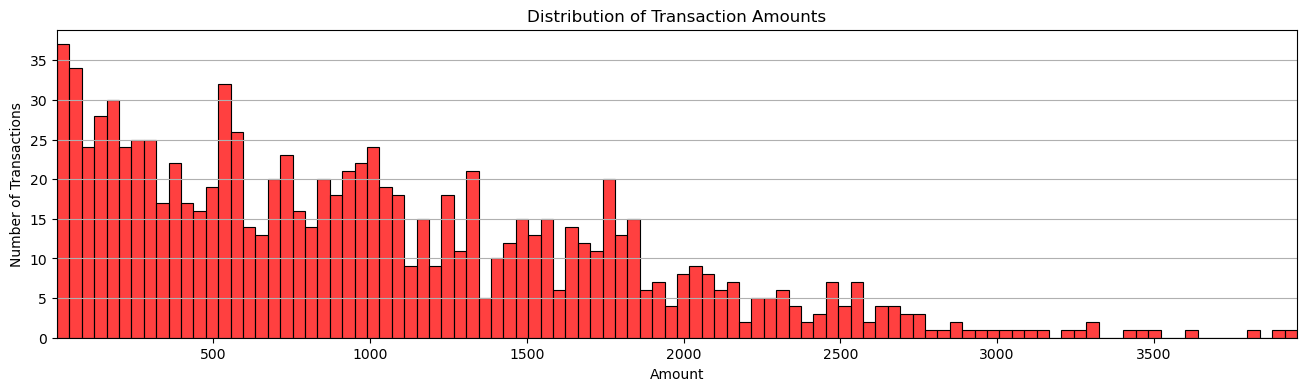

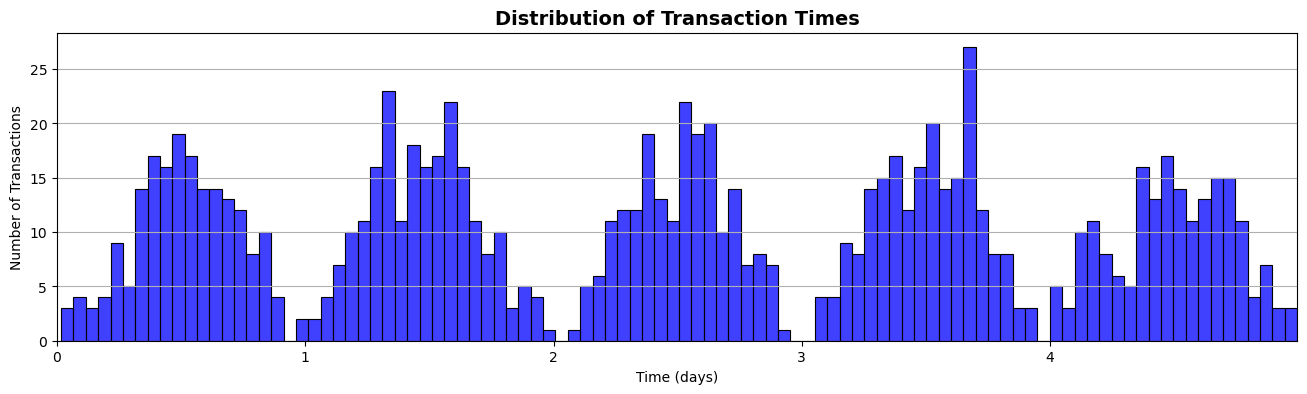

In [19]:
# Plotting Distribution of Transaction Amounts and Times

distribution_amount_fig, ax=plt.subplots(1, figsize=(16,4))

amount_val = transactions_df[transactions_df.tx_time_days<5]['tx_amount'].sample(n=1000).values

plt.grid(axis='y')

sns.histplot(data=amount_val, ax=ax, bins=100, color='red', kde=False)
plt.title('Distribution of Transaction Amounts')
plt.xlim([min(amount_val),max(amount_val)])
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')

distribution_times_fig, ax=plt.subplots(1, figsize=(16,4))

time_val = transactions_df[transactions_df.tx_time_days<5]['tx_time_seconds'].sample(n=1000).values

plt.grid(axis='y')
# Divide the time variables by 86400 to transform seconds into days in the plot
sns.histplot(data=time_val/86400, ax=ax, color='blue', bins=100, kde=False)
plt.title('Distribution of Transaction Times', fontsize=14, weight='semibold')
plt.xlim([min(time_val/86400), max(time_val/86400)])
plt.xticks(range(5))
plt.xlabel('Time (days)')
plt.ylabel('Number of Transactions')

In [20]:
# Add Fraud Scenarios

def add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df):
    
    # By default, all transactions are genuine
    transactions_df['TX_FRAUD']=0
    transactions_df['TX_FRAUD_SCENARIO']=0
    
    # Scenario 1
    # Registering possible fraud if the transaction amount is in a range

    def score_tx_amount(amt_str):
        amount = float(amt_str)
        if amount < 500: return 0
        score = 0.1
        if amount > 1000: score += 0.1
        if amount > 2000: score += 0.1
        if amount > 3000: score += 0.2
        if amount > 4000: score += 0.2
        return score

    transactions_df['TX_FRAUD'] = transactions_df['tx_amount'].apply(score_tx_amount)
    transactions_df['TX_FRAUD_SCENARIO'] = transactions_df['TX_FRAUD'].apply(lambda txf: 0 if txf == 0 else 1)

    nb_frauds_scenario_1 = transactions_df.TX_FRAUD.sum()
    print("Number of Frauds from scenario 1: "+str(nb_frauds_scenario_1))


    # transactions_df['TX_FRAUD'] = np.where(transactions_df['tx_amount']==(300>400),transactions_df['TX_FRAUD'], +=0.1)
    # transactions_df['TX_FRAUD_SCENARIO'] = np.where(transactions_df['tx_amount']==(300>400),\
    #                                                 transactions_df['TX_FRAUD_SCENARIO'], 1)

    # transactions_df['TX_FRAUD'] = np.where(transactions_df['tx_amount']==(400>500),transactions_df['TX_FRAUD'], +=0.1)
    # transactions_df['TX_FRAUD_SCENARIO'] = np.where(transactions_df['tx_amount']==(400>500),\
    #                                                 transactions_df['TX_FRAUD_SCENARIO'], 1)

    # transactions_df['TX_FRAUD'] = np.where(transactions_df['tx_amount']==(500>600),transactions_df['TX_FRAUD'], +0.1)
    # transactions_df['TX_FRAUD_SCENARIO'] = np.where(transactions_df['tx_amount']==(500>600),\
    #                                                 transactions_df['TX_FRAUD_SCENARIO'], 1)

    # transactions_df['TX_FRAUD'] = np.where(transactions_df['tx_amount']==(600>700),transactions_df['TX_FRAUD'], +0.1)
    # transactions_df['TX_FRAUD_SCENARIO'] = np.where(transactions_df['tx_amount']==(600>700),\
    #                                                 transactions_df['TX_FRAUD_SCENARIO'], 1)

    # transactions_df['TX_FRAUD'] = np.where(transactions_df['tx_amount']==(700>800),transactions_df['TX_FRAUD'], +0.1)
    # transactions_df['TX_FRAUD_SCENARIO'] = np.where(transactions_df['tx_amount']==(700>800),\
    #                                                 transactions_df['TX_FRAUD_SCENARIO'], 1)

    # transactions_df['TX_FRAUD'] = np.where(transactions_df['tx_amount']==(800>900),transactions_df['TX_FRAUD'], +0.1)
    # transactions_df['TX_FRAUD_SCENARIO'] = np.where(transactions_df['tx_amount']==(800>900),\
    #                                                 transactions_df['TX_FRAUD_SCENARIO'], 1)

    # transactions_df['TX_FRAUD'] = np.where(transactions_df['tx_amount']==(900>1000),transactions_df['TX_FRAUD'], +0.2)
    # transactions_df['TX_FRAUD_SCENARIO'] = np.where(transactions_df['tx_amount']==(900>1000),\
    #                                                 transactions_df['TX_FRAUD_SCENARIO'], 1)    

    # transactions_df['TX_FRAUD'] = np.where(transactions_df['tx_amount']==(1000>2000),transactions_df['TX_FRAUD'], +0.2)
    # transactions_df['TX_FRAUD_SCENARIO'] = np.where(transactions_df['tx_amount']==(1000>2000),\
    #                                                 transactions_df['TX_FRAUD_SCENARIO'], 1)    

    # transactions_df['TX_FRAUD'] = np.where(transactions_df['tx_amount']==(2000>3000),transactions_df['TX_FRAUD'], +0.2)
    # transactions_df['TX_FRAUD_SCENARIO'] = np.where(transactions_df['tx_amount']==(2000>3000),\
    #                                                 transactions_df['TX_FRAUD_SCENARIO'], 1)    

    # transactions_df['TX_FRAUD'] = np.where(transactions_df['tx_amount']==(3000>4000),transactions_df['TX_FRAUD'], +0.3)
    # transactions_df['TX_FRAUD_SCENARIO'] = np.where(transactions_df['tx_amount']==(3000>4000),\
    #                                                 transactions_df['TX_FRAUD_SCENARIO'], 1)    

    # nb_frauds_scenario_1=transactions_df.TX_FRAUD.sum()
    # print("Number of Frauds from scenario 1: "+str(nb_frauds_scenario_1))


    # # Scenario 2
    # # Registering possible fraud if criminal use of random terminals via phishing methods
    for day in range(transactions_df.tx_time_days.max()):

        compromised_terminals = terminal_profiles_table.terminal_id.sample(n=2, random_state=day)
        
        compromised_transactions = transactions_df[(transactions_df.tx_time_days>=day) &\
                                                (transactions_df.tx_time_days<day+28) &\
                                                (transactions_df.terminal_id.isin(compromised_terminals))]
                                
        transactions_df.loc[compromised_transactions.index, 'TX_FRAUD'] += 0.5
        transactions_df['TX_FRAUD_SCENARIO'] = transactions_df['TX_FRAUD_SCENARIO'].values.astype(str)
        transactions_df.loc[compromised_transactions.index,'TX_FRAUD_SCENARIO'] = 2
        # transactions_df.update('TX_FRAUD_SCENARIO', join='left', overwrite=False, filter_func=None, errors='ignore')
        # transactions_df.loc[compromised_transactions.index,'TX_FRAUD_SCENARIO'] = 2

    nb_frauds_scenario_2 = transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_1
    print("Number of frauds from scenario 2: "+str(nb_frauds_scenario_2))

    # # Scenario 3
    # # Registering possible fraud if random customer has unusual transaction amounts
    # # This scenario shows 1/3 of transactions amounts multiplied by 5 over 14 days
    for day in range(transactions_df.tx_time_days.max()):
        
            compromised_customers = customer_profiles_table.customer_id.sample(n=3, random_state=day).values
        
            compromised_transactions = transactions_df[(transactions_df.tx_time_days>=day) & 
                                                        (transactions_df.tx_time_days<day+14) & 
                                                        (transactions_df.customer_id.isin(compromised_customers))]
        
            nb_compromised_transactions = len(compromised_transactions)
        
            random.seed(day)
            index_fauds = random.sample(list(compromised_transactions.index.values),k=int(nb_compromised_transactions/3))
        
            transactions_df.loc[index_fauds,'tx_amount'] = transactions_df.loc[index_fauds,'tx_amount']*5
            transactions_df.loc[index_fauds,'TX_FRAUD'] += 0.3
            transactions_df.loc[index_fauds,'TX_FRAUD_SCENARIO'] = 3

    nb_frauds_scenario_3 = transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_2-nb_frauds_scenario_1
    print("Number of frauds from scenario 3: "+str(nb_frauds_scenario_3))

    # Removing Scenario 4 due to Memory Error 

    # # Scenario 4
    # # Registering Possible Suspicious Terminals
    # # These Terminals would be outside a radius of 50 from customers location
            
            # Maybe attempt adding a random sprinkled sample of Sus Terminals & Trans that would be outside the radius from customer
            # This would act as if the MBR's card had been stolen/compromised & used outside the normal area

    # transactions_df.loc[(transactions_df['sus_terminal_id'] is not np.nan), transactions_df.TX_FRAUD]=+0.3
    # transactions_df.loc[index_fauds,'TX_FRAUD_SCENARIO']=4                      

    # nb_frauds_scenario_4=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_3-nb_frauds_scenario_2-nb_frauds_scenario_1
    # print("Number of frauds from scenario 4: "+str(nb_frauds_scenario_4))

            # Maybe create a Scenario where there are many transactions in a short time range
            # This would act as if the MBR's card had been stolen/compromised & attempting to drain account

    # transactions_df['TX_FRAUD_SCENARIO'] = list(np.where(scenario1 | scenario2 | scenario3)[0])

    # transactions_df['TX_FRAUD_SCENARIO'] = list(np.where(transactions_df['TX_FRAUD_SCENARIO']>0))
    return transactions_df                 

In [21]:
# Add Fraud Transactions using these scenarios
%time transactions_df = add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df)

Number of Frauds from scenario 1: 273901.50000000006
Number of frauds from scenario 2: 5258.499999999942
Number of frauds from scenario 3: 1615.8000000001048
CPU times: total: 57.7 s
Wall time: 57.9 s


In [22]:
# Average Number of Fraud Transactions
transactions_df.query('TX_FRAUD_SCENARIO == 3 & TX_FRAUD > 0.9')

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,TX_FRAUD,TX_FRAUD_SCENARIO
516906,516906,2023-12-22 12:39:55,4253,5999,20041.45,1859995,21,1.0,3
547632,547632,2023-12-23 17:00:13,4163,9953,8370.35,1962013,22,1.0,3
648841,648841,2023-12-28 04:16:07,1,2688,5863.05,2348167,27,1.0,3
737490,737490,2023-12-31 15:51:13,4163,4902,20795.90,2649073,30,1.0,3
958987,958987,2024-01-10 01:44:12,3078,8020,20085.60,3462252,40,1.0,3
960048,960048,2024-01-10 03:59:25,1790,8793,7991.80,3470365,40,1.0,3
1336585,1336585,2024-01-25 16:15:14,33,5581,5629.45,4810514,55,1.0,3
1633639,1633639,2024-02-07 07:17:50,3643,3462,24020.05,5901470,68,1.0,3
1742270,1742270,2024-02-11 15:01:10,4475,3054,20947.40,6274870,72,1.0,3
2032010,2032010,2024-02-23 16:50:05,2314,5256,12509.15,7318205,84,1.1,3


In [23]:
# Number of Fraud Transactions
transactions_df.TX_FRAUD.sum()

280775.8000000001

In [24]:
transactions_df.head()

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2023-12-01 00:00:16,3714,7482,422.96,16,0,0.0,0
1,1,2023-12-01 00:01:28,4232,3374,765.62,88,0,0.1,1
2,2,2023-12-01 00:01:41,3887,1708,1006.72,101,0,0.2,1
3,3,2023-12-01 00:02:05,3620,2566,279.18,125,0,0.0,0
4,4,2023-12-01 00:02:10,4961,9526,1616.40,130,0,0.2,1


In [25]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==1].shape

(0, 9)

In [26]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==2].shape

(12, 9)

In [27]:
transactions_df[transactions_df.TX_FRAUD_SCENARIO==3].shape

(5380, 9)

In [28]:
transactions_df

,transaction_id,tx_datetime,customer_id,terminal_id,tx_amount,tx_time_seconds,tx_time_days,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2023-12-01 00:00:16,3714,7482,422.96,16,0,0.0,0
1,1,2023-12-01 00:01:28,4232,3374,765.62,88,0,0.1,1
2,2,2023-12-01 00:01:41,3887,1708,1006.72,101,0,0.2,1
3,3,2023-12-01 00:02:05,3620,2566,279.18,125,0,0.0,0
4,4,2023-12-01 00:02:10,4961,9526,1616.40,130,0,0.2,1
...,...,...,...,...,...,...,...,...,...
2156238,2156238,2024-02-28 23:59:17,1554,2827,1981.67,7775957,89,0.2,1
2156239,2156239,2024-02-28 23:59:21,3940,1512,29.95,7775961,89,0.0,0
2156240,2156240,2024-02-28 23:59:26,409,1163,1493.31,7775966,89,0.2,1
2156241,2156241,2024-02-28 23:59:36,3466,5803,20.60,7775976,89,0.0,0


In [43]:
def get_stats(transactions_df):
    # Number of Transactions per Day
    nb_tx_per_day = transactions_df.groupby(['tx_time_days'])['customer_id'].count()
    # Number of Fraudulent Transactions per Day
    nb_fraud_per_day = transactions_df.groupby(['tx_time_days'])['TX_FRAUD'].sum()
    # Number of Fraudulent Cards per Day
    nb_fraudcard_per_day = transactions_df[transactions_df['TX_FRAUD']>0]\
        .groupby(['tx_time_days']).customer_id.nunique()
    
    return (nb_tx_per_day, nb_fraud_per_day, nb_fraudcard_per_day)

(nb_tx_per_day, nb_fraud_per_day, nb_fraudcard_per_day) = get_stats(transactions_df)

n_days = len(nb_tx_per_day)
tx_stats = pd.DataFrame({'value':pd.concat([nb_tx_per_day/50, nb_fraud_per_day,nb_fraudcard_per_day])})
tx_stats['stat_type'] = ['nb_tx_per_day']*n_days+['nb_fraud_per_day']*n_days+['nb_fraudcard_per_day']*n_days
tx_stats = tx_stats.reset_index()

In [50]:
%%capture

sns.set(style='darkgrid')
sns.set(font_scale=1.4)

fraud_and_transactions_stats_fig = plt.gcf()

fraud_and_transactions_stats_fig.set_size_inches(15, 8)

sns_plot = sns.lineplot(x='tx_time_days', y='value', data=tx_stats, hue='stat_type', 
                    hue_order=['nb_tx_per_day', 'nb_fraud_per_day', 'nb_fraudcard_per_day'], 
                    legend=False)

sns_plot.set_title('Total Transactions, and Number of Fraudulent Transactions \n \
    and number of compromised cards per day', fontsize=20)
sns_plot.set(xlabel = "Number of days since beginning of data generation", 
            ylabel="Number")

sns_plot.set_ylim([0,4000])

labels_legend = ['# Transactions per Day (/50)', 
                '# Fraudulent Transactions per Day', 
                '# Fraudulent Cards per Day']

sns_plot.legend(loc='upper left', labels=labels_legend, 
                bbox_to_anchor=(1.05, 1), fontsize=15)

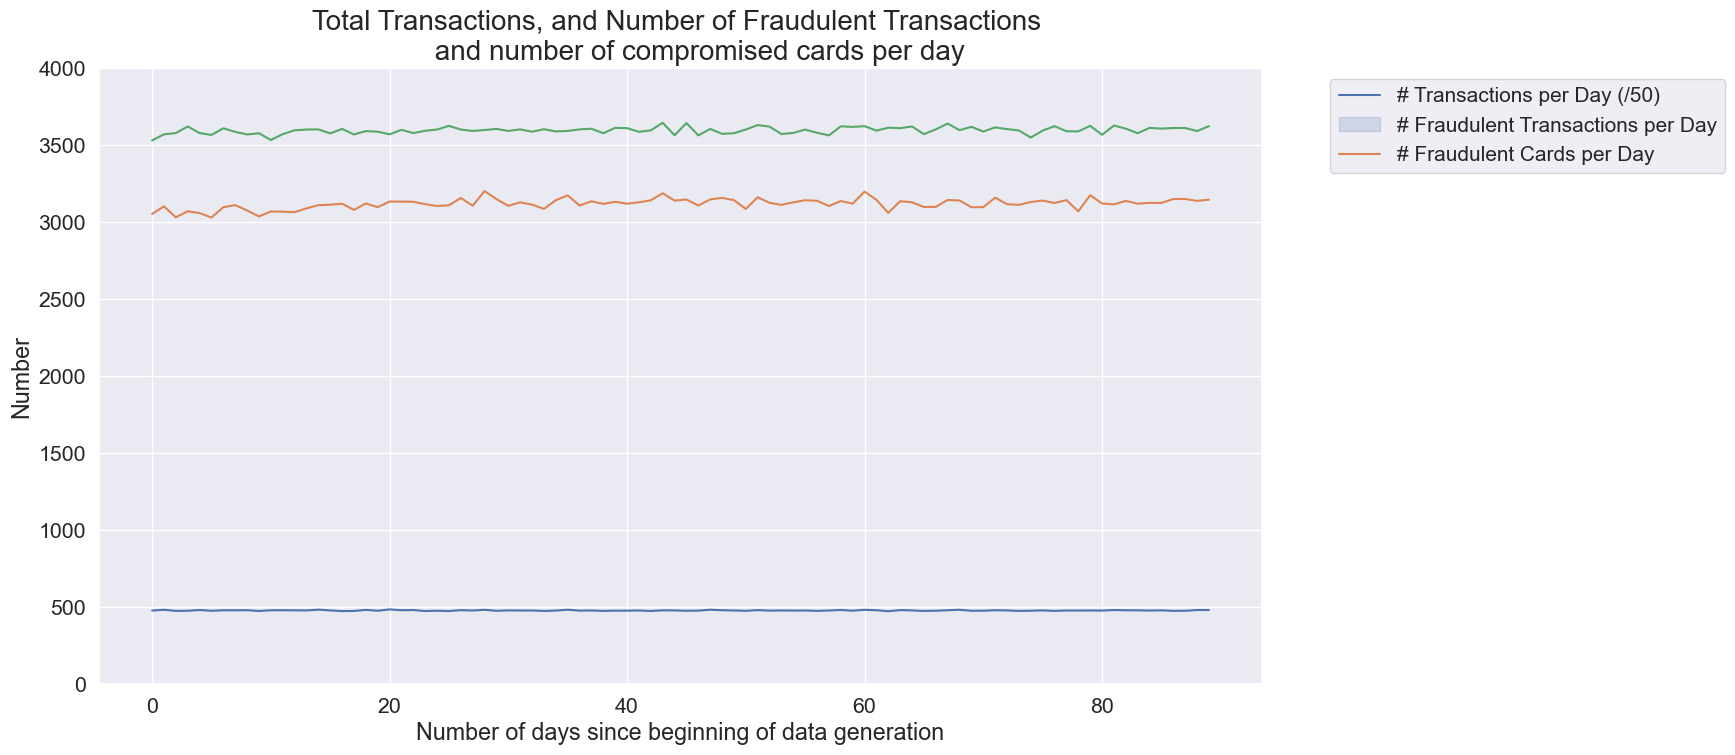

In [51]:
fraud_and_transactions_stats_fig

In [54]:
dir_output = "./simulated-data-raw/"

if not os.path.exists(dir_output):
    os.makedirs(dir_output)

start_date = datetime.datetime.strptime("2023-12-01", "%Y-%m-%d")

for day in range(transactions_df.tx_time_days.max()+1):
    
    transactions_day = transactions_df[transactions_df.tx_time_days==day]\
        .sort_values('tx_time_seconds')
    
    date = start_date + datetime.timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'
    
    # Protocol=4 required for Google Colab
    transactions_day.to_pickle(dir_output+filename_output, protocol=4)